# Emulación de una semana de trabajo en DataScientist

El gran objetivo del proyecto en el que vas a trabajar es reducir la fuga de empleados de la empresa. El principal problema es la rotación de empleados. Deberás trabajar en un sistema que consiga reducir la fuga de empleados. La empresa no tiene una metrica clara de abandono, además de la perdida de talento, le está ocasionado a la empresa grandes gastos en costes de reemplazo. No saben siquiera si hay un perfil claro de empleados que puedan estar en riesgo.

La empresa necesita entender cuantitativamente qué está pasando a nivel de negocio, y crear un sistema basado en datos que ayude a solucinar el problema.

Para ello durante esta semana vas a trabajar en 3 grandes cosas:

1. Entender y cuantificar el problema desde el punto de vista de negocio
2. Desarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga
3. Comunicar los resultados de forma exitosa a la dirección

## IMPORTANTE : Entender el tipo de solución de data science que vamos a construir

1) BUSINESS ANALYTICS: generar insights, conclusiones que permitan entender y cuantificar el problema desde el punto de vista del negocio.

2) MACHINE LEARNING: desarrollar un modelo de Machine Learning que automatice la predicción de lo que nos está interesando en cada proyecto.

3) PRODUCTIVIZACIÓN: generar un producto de datos sobre las conclusiones y resultados de las dos fases anteriores. Una vez que realizas el trabajo, hay que "paquetizarlo" o "productivizarlo". Generalmente un cuadro de mando.

### Fase de BUSINESS ANALYTICS

Necesitamos unos datos, hacemos análisis para señalar la Señal del Ruido (la parte importante de la que no dentro de los datos).

En nuestro ejemplo necesitamos saber cual es la tasa de abandono, cuales son las razones, etc...

Los insights son las conclusiones que tienen mucha importancia o relevancia para la empresa.

### Fase de MACHINE LEARNING
Generalmente se accede a la fase de datos que tendrá un cierto histórico (por ejemplo los últimos 3 años), a partir de ahí generamos los modelos de Machine Learning. Una vez que el modelo está entrenado, lo utilizamos para generar predicciones sobre nuevos datos.

### Fase de PRODUCTIVIZACIÓN
Se genera un producto de datos. Generalmente es un cuadro de mando que graficamente nos permita realizar la toma de decisiones.

## **BUSINESS ANALYTICS**

Las tareas para hoy son entender la tasa de abandono, ver si hay un perfil de empleado que se va de la empresa, cuanto le está costando a la empresa esta perdida de personal, y por último estimar cuanto dinero podría ahorrarse fidelizando mejor a los empleados.

Tenemos entonces que encontrar insights de valor.

Nuestra tarea de Bussiness Analytics sigue 3 grandes subfases:

1) Análisis de la calidad de los datos: entender los datos con los que estamos trabajando, aplicando una serie de técnicas para "garantizar" que la calidad de esos datos es correcta. Con esos errores podemos buscar soluciones con nuevas extracciones o datos alternativos. La intención es intentar no arrastrar errores a los siguientes pasos.

2) Análisis exploratorio de Variables: EDA, entender qué variables tenemos en el DataSet y qué información nos ofrecen. Y

3) Análisis y generación de insights: la idea es buscar las preguntas semillas. Con el conocimiento que tenemos buscamos las "preguntas más importantes", cuyas respuestas nos ayudarán a encontrar nuevos focos de atención.

### Cargamos las librerias y el dataset

*Nota*: crea un entorno para instalar los modulos

In [1]:
#!pip install requirements.txt

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
ruta=os.path.join(os.getcwd())
ruta

'c:\\Users\\alici\\Desktop\\Programación\\Kaggle'

In [5]:
df=pd.read_csv(ruta+r'/data/AbandonoEmpleados.csv', sep=';',na_values='#N/D')  #index_col='id'
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,id,satisfaccion_entorno,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
0,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,1,Media,...,Baja,80,0,8,0,NaN,6,NaN,0,5
1,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,2,Alta,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,4,Muy_Alta,...,Media,80,0,7,3,NaN,0,2.0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,5,Muy_Alta,...,Alta,80,0,8,3,NaN,8,3.0,3,0
4,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,7,Baja,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   id                        1470 non-null   int64  
 9   satisfaccion_entorno      1470 non-null   object 
 10  sexo                      1271 non-null   float64
 11  implicacion               1452 non-null   object 
 12  nivel_laboral             1470 non-null   int64  
 13  puesto                    1470 non-null   object 
 14  satisfac

Abandono es la variable target

### Análisis de Nulos

In [7]:
df.isnull().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
departamento                   0
edad                           0
empleados                      0
carrera                        0
distancia_casa                 0
satisfaccion_entorno           0
id                             0
nivel_laboral                  0
viajes                         0
abandono                       0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde

Hay valores perdidos en:
- años en el puesto: 1238
- conciliacion: 1011
- sexo: 199
- educacion: 101
- satisfaccion trabajo: 76
- implicacion: 18

Conclusiones:

- Eliminamos "años en el puesto" y "conciliacion" porque tienen muchos valores perdidos
- sexo, educacion, satisfaccion e implicacion las sobrescribirimos con un valor mas probable (imputacion)

In [8]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   id                        1470 non-null   int64  
 9   satisfaccion_entorno      1470 non-null   object 
 10  sexo                      1271 non-null   float64
 11  implicacion               1452 non-null   object 
 12  nivel_laboral             1470 non-null   int64  
 13  puesto                    1470 non-null   object 
 14  satisfac

### EDA de las Variables Categóricas

In [9]:
variables_categoricas=df.select_dtypes('O')

variables_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   abandono                 1470 non-null   object
 1   viajes                   1470 non-null   object
 2   departamento             1470 non-null   object
 3   educacion                1369 non-null   object
 4   carrera                  1470 non-null   object
 5   satisfaccion_entorno     1470 non-null   object
 6   implicacion              1452 non-null   object
 7   puesto                   1470 non-null   object
 8   satisfaccion_trabajo     1394 non-null   object
 9   estado_civil             1470 non-null   object
 10  mayor_edad               1470 non-null   object
 11  horas_extra              1470 non-null   object
 12  evaluacion               1470 non-null   object
 13  satisfaccion_companeros  1470 non-null   object
dtypes: object(14)
memory usage: 160.9+ KB


In [10]:
# Problema:
# Si divides directamente: n_vars / n_cols → te da un número decimal (que no sirve para subplots).

# Necesitas hacer una división entera hacia arriba (lo que en matemáticas sería "ceil(n_vars / n_cols)").

In [11]:
# reset.index(): convierte el índice actual (que son los valores únicos de col) en una columna normal.

# El índice de la Serie pasa a ser numérico (0, 1, 2, ...).

# Resultado: un DataFrame con dos columnas.

# La primera columna son los valores únicos.

# La segunda columna es la frecuencia (con un nombre automático, por ejemplo, color).

In [12]:
import math

def plot_var_categoricas(df,variables):
    n_vars=len(variables_categoricas)
    n_cols=2 #columnas del grafico
    n_rows=math.ceil(n_vars/n_cols) # Ahora sí, redondea hacia arriba

    plt.figure(figsize=(15,n_rows*8))

    for idx, col in enumerate(variables_categoricas):
        plt.subplot(n_rows,n_cols, idx+1)

        frecuencias=df[col].value_counts().reset_index()
        frecuencias.columns=[col,'frecuencia']

        plt.barh(frecuencias[col],frecuencias['frecuencia'])
        plt.title(f'Frecuencia Vs {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel(col)
    plt.show()

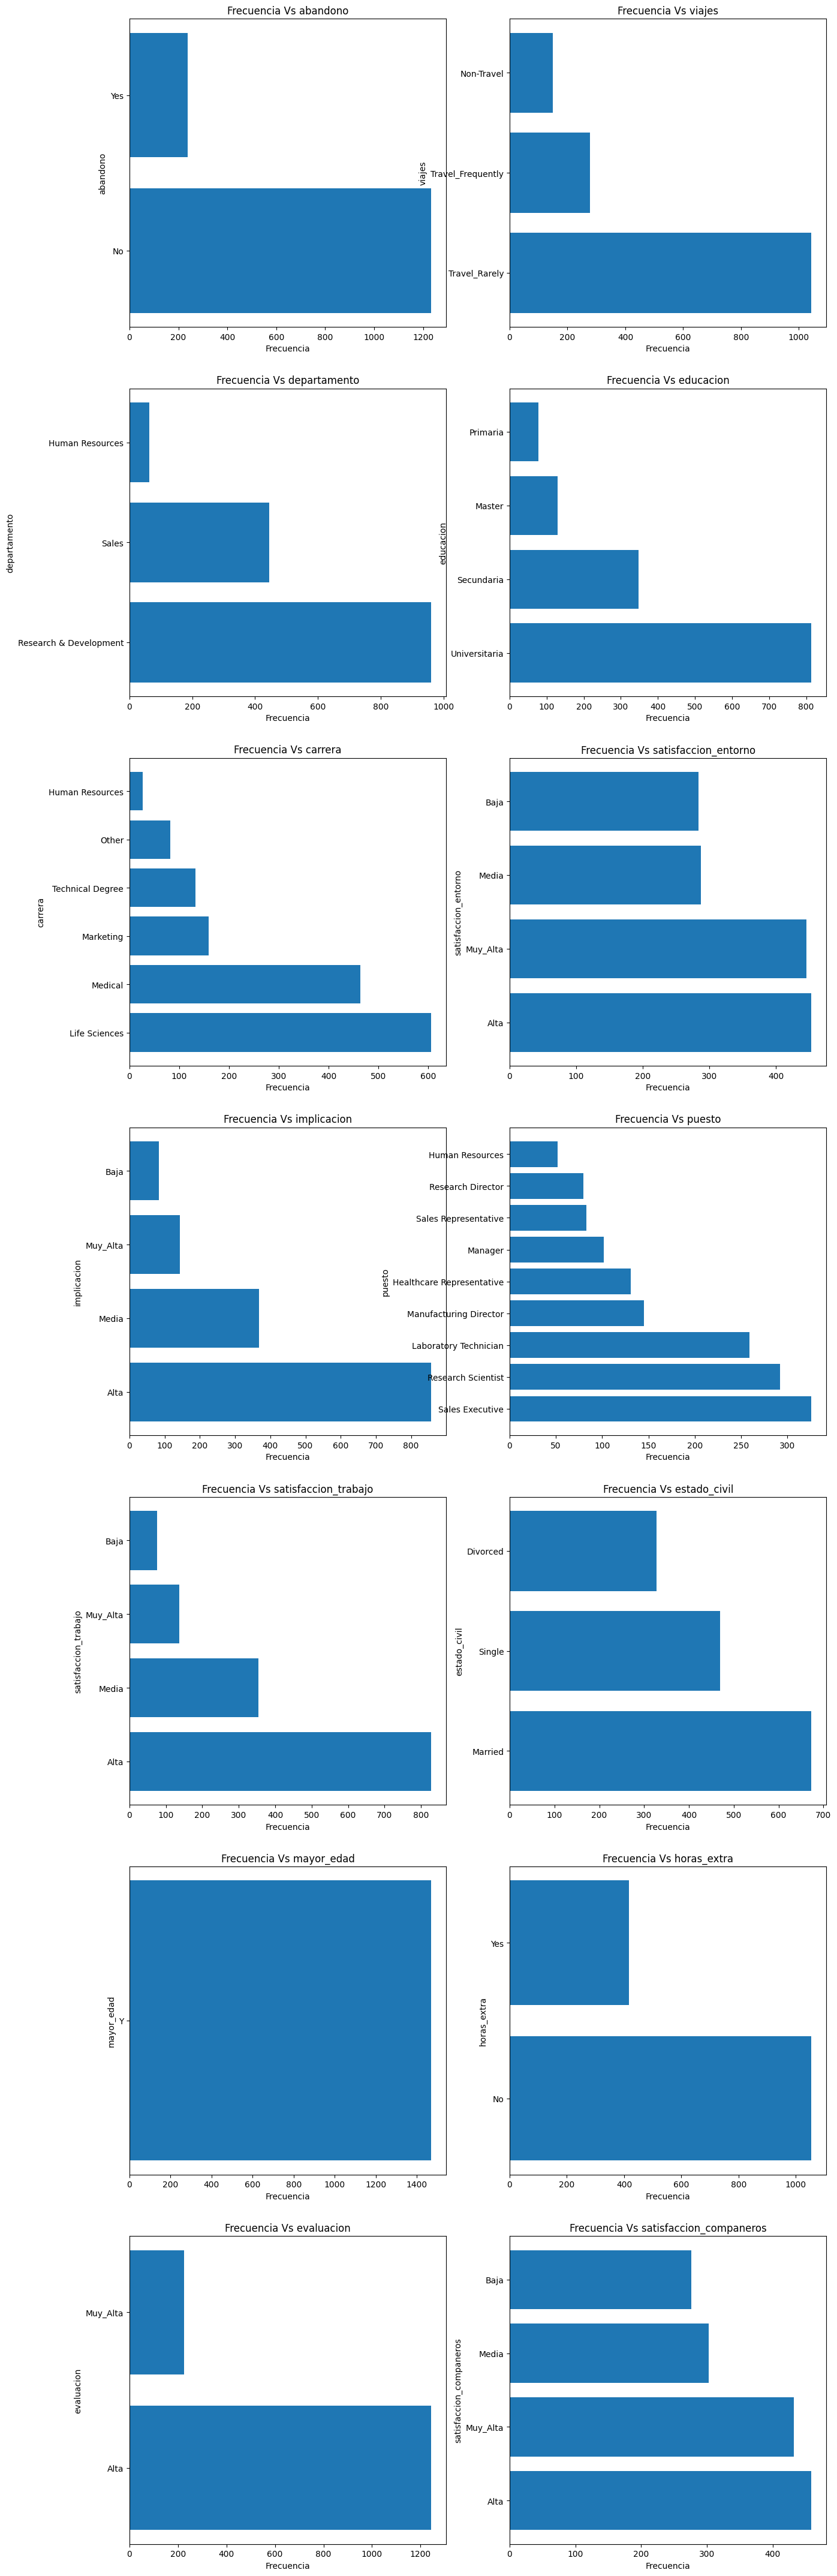

In [13]:
plot_var_categoricas(df,variables_categoricas)

Conclusiones:
1. La variable mayor_edad solo tiene un valor unico. Decidimos eliminarla.
2. Las variables pendientes por imputar las imputaremos por su categoria mas numerosa:
    - Implicacion: NA's --> Alta
    - Educacion: NA's --> Universitaria
    - Satisfaccion trabajo: NA's --> Alta

3. La variable target "abandono" tiene desbalanceo de clases y puede que tengamos que balancearlos mediante algun metodo en la fase de machine learning

NOTA: hoy otros métodos más complejos de imputacion que se podrían explorar

In [14]:
df.drop(columns='mayor_edad',inplace=True)  #NO: df=df.drop(columns='mayor_edad',inplace=True)

In [15]:
df['educacion']=df['educacion'].fillna('Universitaria')
df['implicacion']=df['implicacion'].fillna('Alta')
df['satisfaccion_trabajo']=df['satisfaccion_trabajo'].fillna('Alta')

### EDA de las Variables Numéricas

In [16]:
variables_numericas=df.select_dtypes('number')

In [17]:
variables_numericas.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
edad,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
distancia_casa,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
empleados,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
id,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
sexo,1271.0,2.727773,0.720788,1.0,2.00,3.0,3.00,4.0
nivel_laboral,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
salario_mes,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
num_empresas_anteriores,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
incremento_salario_porc,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
horas_quincena,1470.0,80.000000,0.000000,80.0,80.00,80.0,80.00,80.0


In [18]:
# def estadisticos_cont(num):
#     #Calculamos describe, y volteamos el cuadro
#     estadisticos = num.describe().T
#     #Añadimos la mediana
#     estadisticos['median'] = num.median()
#     #Reordenamos para que la mediana esté al lado de la media
#     estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
#     #Lo devolvemos
#     return(estadisticos)

Conclusiones:
- El sexo tiene valores: eliminarla, no tiene sentido (deberia ser categorica)
- Empleado solo tiene un unico valor: eliminarla
- Horas quincena solo tiene un valor, eliminarla

In [19]:
df.drop(columns=['sexo','empleados','horas_quincena'],inplace=True)

In [20]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,id,satisfaccion_entorno,implicacion,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
0,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,Yes,11,Alta,Baja,0,8,0,6,0,5
1,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,2,Alta,Media,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,4,Muy_Alta,Media,...,Yes,15,Alta,Media,0,7,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,5,Muy_Alta,Alta,...,Yes,11,Alta,Alta,0,8,3,8,3,0
4,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,7,Baja,Alta,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   id                        1470 non-null   int64 
 8   satisfaccion_entorno      1470 non-null   object
 9   implicacion               1470 non-null   object
 10  nivel_laboral             1470 non-null   int64 
 11  puesto                    1470 non-null   object
 12  satisfaccion_trabajo      1470 non-null   object
 13  estado_civil              1470 non-null   object
 14  salario_mes             

### Generación de Insights

Teniamos que resolver principalmente 4 preguntas en esta seccion de Business Analytics: 

- tasa de abandono
- ver si hay un perfil de empleado que se va de la empresa
- cuanto le está costando a la empresa esta perdida de personal 
- estimar cuanto dinero podría ahorrarse fidelizando mejor a los empleados.

1. Tasa de Abandono

    Definicion: el numero de personas que se van entre el total de empleados

In [22]:
# Utilizamos "normalize = True" para obtener el porcentaje
df['abandono'].value_counts(normalize=True)*100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

2. Identificando el perfil de empleado en fuga

    Para esta pregunta realizaremos un análisis de penetración: cruzaremos la variable target (abandono) con aquellas que creemos que pueden tener algo que ver con ese abandono.

Salario: si cobran poco es probable que se vayan

Horas extras: si hacen muchas horas extras es probable que se vayan

estado civil: si no tiene una familia que mantener es mas probable que se vayan

puesto: si es un puesto poco estimulante pueden que se vayan / tambien si es muy demandante

[otras variables]= distancia casa, satisfaccion(),...

In [23]:
#recordemos de que clase son las variables que queremos estudiar

variables_estudio=df[['salario_mes','horas_extra','estado_civil','puesto','distancia_casa','educacion']]

variables_estudio.dtypes

salario_mes        int64
horas_extra       object
estado_civil      object
puesto            object
distancia_casa     int64
educacion         object
dtype: object

¿Cuanto cobran los que no abandonan, y cuanto cobran los que sí abandonan?

<Axes: xlabel='abandono'>

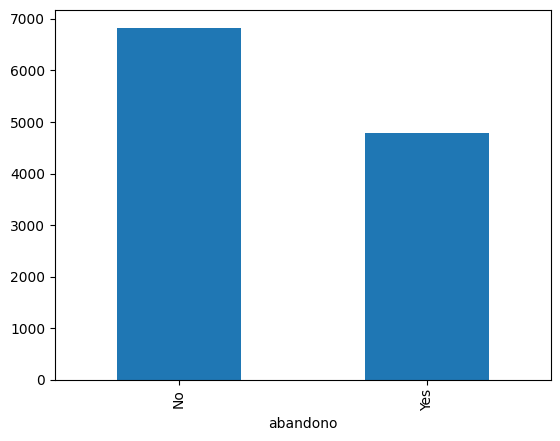

In [24]:
#Estudio del salario mensual agrupados por abandono

temp=df.groupby('abandono').salario_mes.mean()
temp.plot.bar()

<Axes: xlabel='abandono'>

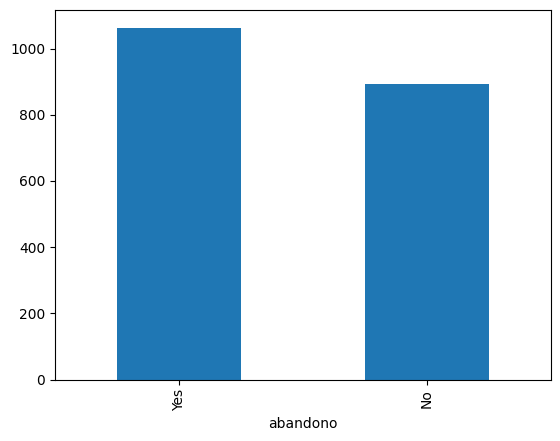

In [25]:
temp=df.groupby('abandono').distancia_casa.mean().sort_values(ascending=False)*100
temp.plot.bar()

De los que abandonan, que porcentaje hacian horas extras, y de los que no abandonan, que porcentaje hacian horas extra?

In [26]:
# # Analisis por horas extras
# temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
# temp.plot.bar();

Pero con este gráfico no puedo conocer las 4 situaciones cruzadas, ya que esta haciendo la media para abandono (valores 0 y 1) --> TABLAS DE CONTINGENCIA para las variables Object

In [27]:
def analisis_abandono(df,variables_analisis, variable_objetivo='abandono'):

    for var in variables_analisis:
        print(f'\n Análisis de abandono según: {var}\n')

        tabla=pd.crosstab(df[var],df[variable_objetivo],margins=True, normalize='index')*100

        tabla_sin_total=tabla.drop(index='All',errors='ignore')

        print(tabla.round(2))

        #Graficar
        tabla_sin_total.plot(kind='bar', stacked=True)

        plt.gcf().set_size_inches(10, 6)

        plt.title(f'% de {variable_objetivo} según {var}')
        plt.ylabel('Porcentaje')
        plt.xlabel(var)
        plt.legend(title='Abandono',loc='upper right')
        plt.xticks(rotation=90)
        plt.ylim(0, 120)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()



 Análisis de abandono según: horas_extra

abandono        No    Yes
horas_extra              
No           89.56  10.44
Yes          69.47  30.53
All          83.88  16.12


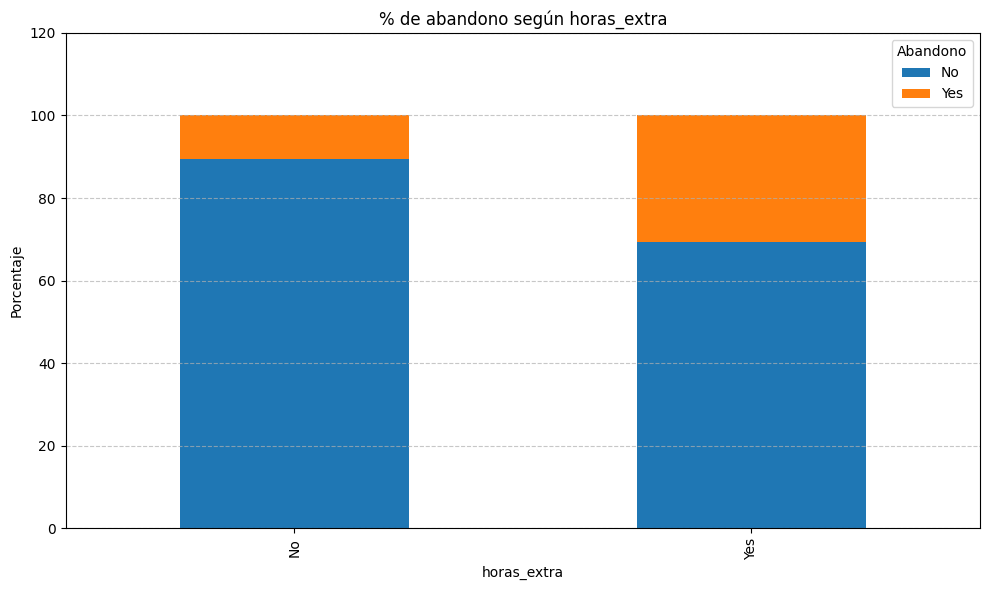


 Análisis de abandono según: estado_civil

abandono         No    Yes
estado_civil              
Divorced      89.91  10.09
Married       87.52  12.48
Single        74.47  25.53
All           83.88  16.12


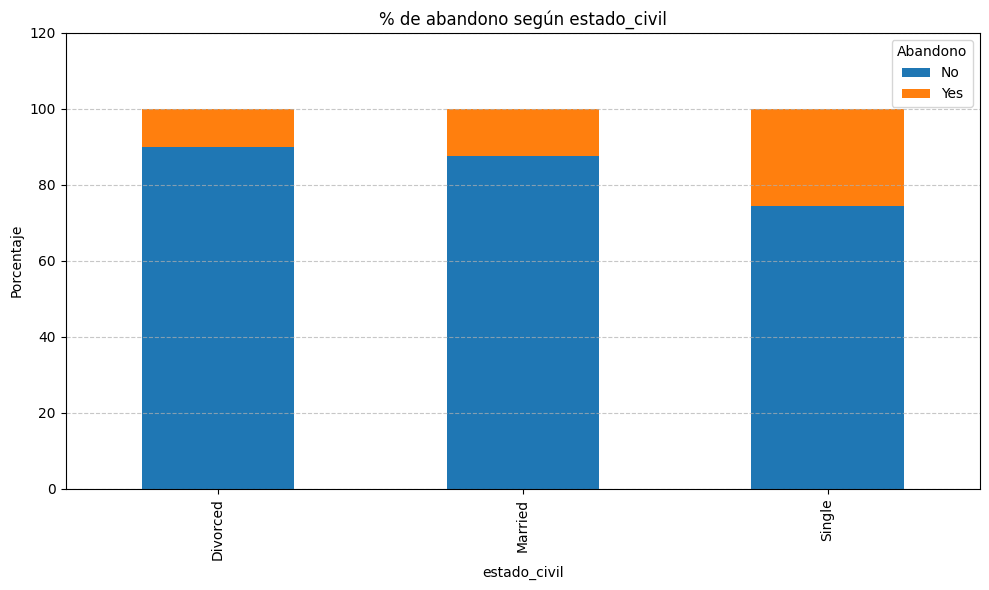


 Análisis de abandono según: puesto

abandono                      No    Yes
puesto                                 
Healthcare Representative  93.13   6.87
Human Resources            76.92  23.08
Laboratory Technician      76.06  23.94
Manager                    95.10   4.90
Manufacturing Director     93.10   6.90
Research Director          97.50   2.50
Research Scientist         83.90  16.10
Sales Executive            82.52  17.48
Sales Representative       60.24  39.76
All                        83.88  16.12


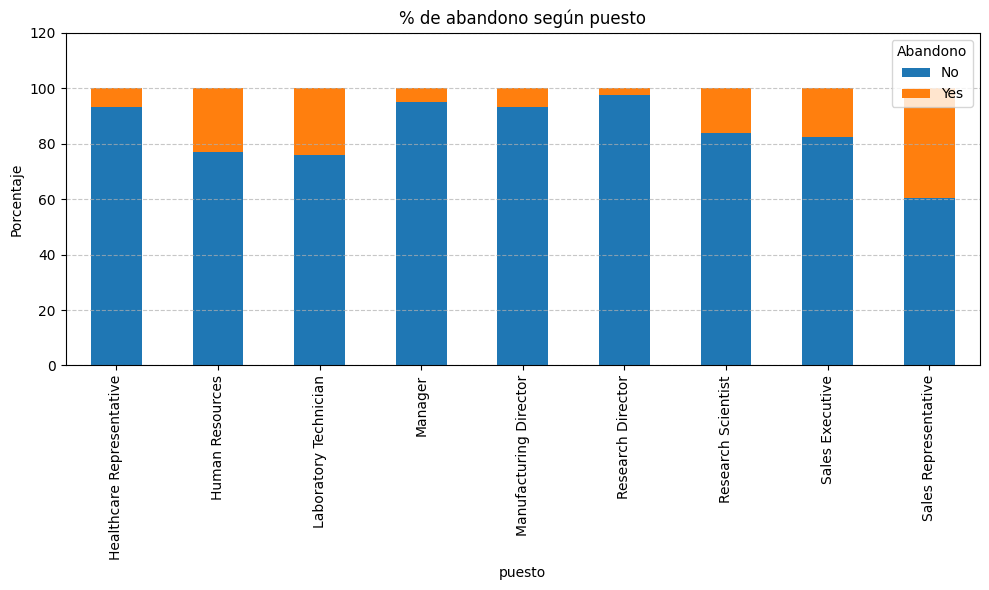


 Análisis de abandono según: educacion

abandono          No    Yes
educacion                  
Master         91.54   8.46
Primaria       67.53  32.47
Secundaria     80.46  19.54
Universitaria  85.46  14.54
All            83.88  16.12


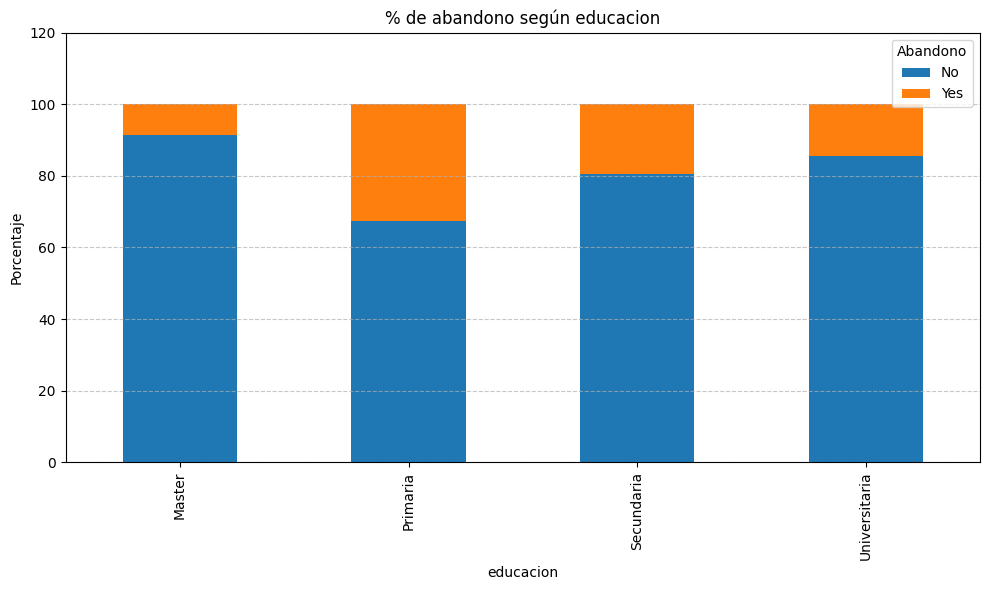

In [28]:
analisis_abandono(df,['horas_extra','estado_civil','puesto','educacion'])

Conclusiones:

- La distancia al trabajo parece no ser significativa (descartada del analisis de perfil)

Parece ser que el perfil de trabajador que suele abandonar es:

- Sueldos por debajo de 5000 euros/mes
- Suelen hacer horas extra
- Solteros
- Trabajan en ventas
- Tienen solo al primaria

3. ¿Cuál es el impacto económico de este problema?

    Según el artículo https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees:

    - El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

    - El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

    - El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

    - El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [29]:
# Primero: tenemos el salario/mes, tenemos que recodificarlo a salario/año

df['salario_ano']=df['salario_mes'].transform(lambda x: x*12)

df[['salario_mes','salario_ano']].head()

,salario_mes,salario_ano
0,5993,71916
1,5130,61560
2,2090,25080
3,2909,34908
4,3468,41616


In [30]:
# Segundo: crear los filtros para cada rango de salario y aplicar el coste en porcentaje a cada rango correspondiente

condiciones=[
    (df['salario_ano']<=30000),
    (df['salario_ano']>30000) & (df['salario_ano']<=50000),
    (df['salario_ano']>50000) & (df['salario_ano']<=75000),
    (df['salario_ano']>75000)
]

ponderaciones=[df['salario_ano']*0.161,df['salario_ano']*0.197,df['salario_ano']*0.204,df['salario_ano']*0.21]

df['impacto_abandono'] = np.select(condiciones,ponderaciones, default = -999)  #valor que se incluirá si ninguna condición se cumple

df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,id,satisfaccion_entorno,implicacion,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
1,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,2,Alta,Media,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
2,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,4,Muy_Alta,Media,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
3,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,5,Muy_Alta,Alta,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
4,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,7,Baja,Alta,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


¿Cúanto nos ha costado este problema en el último año? (coste total)

In [31]:
coste_total=df.loc[df['abandono']=='Yes'].impacto_abandono.sum()
print(coste_total)

2719005.912


¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)¶

In [32]:
print(df.loc[(df['abandono']=='Yes') & (df['implicacion']=='Baja')].impacto_abandono.sum())

368672.688


¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

Creación de escenarios de ahorro. Hacemos 3 niveles (reducir un 10, 20 y 30 % el abandono)

In [33]:
print(
    f'\nReducir un 10% la fuga de empleados nos ahorra {int(coste_total * 0.1)}$ cada año.\n'
    f'Reducir un 20% la fuga de empleados nos ahorra {int(coste_total * 0.2)}$ cada año.\n'
    f'Reducir un 30% la fuga de empleados nos ahorra {int(coste_total * 0.3)}$ cada año.\n'
)



Reducir un 10% la fuga de empleados nos ahorra 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorra 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorra 815701$ cada año.



Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos su fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado



In [34]:
total_ventas=len(df.loc[df['puesto']=='Sales Representative'])

total_ventas_abandono=len(df.loc[(df['abandono']=='Yes') & (df['puesto']=='Sales Representative')])

porc_pasado=total_ventas_abandono/total_ventas

porc_pasado

0.39759036144578314

Ahora podemos estimar cuántos se nos irán este año dentro del departamento de representantes de ventas:

In [35]:
import math

total_ventas_actual=len(df.loc[(df['puesto']=='Sales Representative') & (df['abandono']=='No')])

pronostico=math.ceil(total_ventas_actual*porc_pasado)

pronostico

20

Sobre estos 20 empleados, podemos estimar cuantos podemos retener (hipótesis 30% de reduccion abandono) y cuanto dinero puede suponer para la empresa:

In [36]:
retenemos = int(pronostico * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 'No'),'impacto_abandono'].sum() * porc_pasado*0.3  #me cuesta entender el porc_pasado*0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos.round(3)}$.')

Podemos retener 6 representantes de ventas y ello supondría ahorrar 37447.224$.


**IMPORTANTE**: La importancia de este dato es muy interesante, pues nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas, vemos que se estarían pagando sólas con la pérdida evitada.

## **Machine Learning**

Hasta ahora hemos comprendido y cuantificado el problema desde el punto de vista de negocio, pero ahora necesitamos construir un sistema automático capaz de encontrar los patrones subyacentes en los datos, y predecir qué empleados concretos están en riesgo de dejar la empresa. Esto nos permitirá actuar empleado a empleado con precisión.

Necesitamos un sistema que analice todo nuestro histórico de datos, y que encuentre los patrones que diferencian a los que abandonan de los que no Dependiendo el modelo de Machine Learning a utilizar, necesitamos preparar los datos de una forma específica.



*Sentando las Bases del Machine Learning*

En nuestra base de datos tenemos lo que ha sucedido hasta hoy. Un modelo de machine learning va a aprender sobre ese histórico y capture las diferencias entre los que abandonan y los que no (fase de entrenamiento), de forma que nos permita hacer predicciones a futuro.

Lo que haremos es separar toda la información en dos grupos de forma aleatoria (normalmente un 70 y 30 por ciento). Sobre el primer grupo construimos el modelo, y lo ejecutamos en el 30 % restante, para contrastar así la predicción con la realidad. No lo hacemos sobre el total para evitar el problema del sobreajuste. Cuanto más se parezcan los datos a la realidad, más confianza nos dará ese modelo (testarlo).

El grupo de entrenamiento es el de Train, y el otro es el de Test.

-Transformando los datos para poder modelizar.-

Realizaremos primero una copia del dataframe original para trabajar sobre él.

In [37]:
# Transformar abandono a numérica, para facilitar los cálculos.
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

In [38]:
df_ml=df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   id                        1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   implicacion               1470 non-null   object 
 10  nivel_laboral             1470 non-null   int64  
 11  puesto                    1470 non-null   object 
 12  satisfaccion_trabajo      1470 non-null   object 
 13  estado_civil              1470 non-null   object 
 14  salario_

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN¶

Tendremos una serie de transformaciones obligatorias (pues sin ellas no podemos realizar un modelo de machine learning), que son dos:

1) No puede haber nulos.

2) Todas las variables tienen que estar en formato numérico.

Como transformaciones optativas tenemos:

- Reescalar las variables: ponerlas todas en la misma escala.
- Normalizar las variables: hacerlas parecidas a una distribución normal. (es escalar, siguiendo la distribucion normal)

En este proceso nos vamos a centrar en las obligatorias.

La primera ya la hemos realizado, pues hemos eliminado todos los nulos.

Para la segunda condición utilizamos la librería sklearn, el método "OneHotEncoder", que tomará cada una de las variables categóricas, y generará una nueva variable con valores 0 y 1 para cada uno de esos valores. Por ejemplo, si tenemos una varible "color" con 3 valores (rojo, amarillo y verde), y la transformará en 3 variables (rojo, amarillo y verde), que tendra para las líneas que tengan el color verde, un 0 en rojo, un 0 en amarillo, y un 1 en verde.



#### One Hot Encoding (OHE)

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes('O')

#Cargamos instancia 
ohe=OneHotEncoder(sparse_output=False) # Evita devolver matriz dispersa

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe=ohe.transform(cat)

#Construimos df
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [40]:
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Lo que hemos hecho hasta ahora es transformar las variables categóricas a números, pero el objeto "cat_ohe" tiene sólo las varibles categóricas. Necesitamos juntar este dataframe con el resto de las variables numéricas.

In [41]:
num=df.select_dtypes('number').reset_index(drop=True)

In [42]:
df_ml=pd.concat([cat_ohe,num], axis=1)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   viajes_Non-Travel                    1470 non-null   float64
 1   viajes_Travel_Frequently             1470 non-null   float64
 2   viajes_Travel_Rarely                 1470 non-null   float64
 3   departamento_Human Resources         1470 non-null   float64
 4   departamento_Research & Development  1470 non-null   float64
 5   departamento_Sales                   1470 non-null   float64
 6   educacion_Master                     1470 non-null   float64
 7   educacion_Primaria                   1470 non-null   float64
 8   educacion_Secundaria                 1470 non-null   float64
 9   educacion_Universitaria              1470 non-null   float64
 10  carrera_Human Resources              1470 non-null   float64
 11  carrera_Life Sciences         

Tenemos ahora el DataFrame con 63 columnas, pues las categóricas están en formato numérico. En esta nueva tabla todos los datos son numéricos.

#### Construcción del  modelo ML

In [43]:
# Separación predictoras y target

X=df_ml.drop(columns='abandono')
y=df_ml['abandono']

In [44]:
#separación de los conjunto de entrenamiento

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**No me decido por qué modelo de ML aplicar, si Regresión Logística, KNN-Vecinos, RandomForest, o Maquinas de Vector Soporte, con lo cual voy a estimar un modelo sencillo de cada y estimaré el que mejor accuracy tenga (otra opciones realizar un ensamble, pero para un dataset tan pequeño y para este problema, no es necesario)**

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Los algoritmo guardados en una lista:

models=[]

models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM',SVC(gamma='auto')))

#Evaluamos cada modelo:
results=[]
names=[]

for name, model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,y_train, cv=kfold,scoring='accuracy')
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

c:\Users\alici\Desktop\Programación\Kaggle\data_scientist\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\alici\Desktop\Programación\Kaggle\data_scientist\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\alici\Desktop\Programación\Kaggle\data_scientist\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\a

LR: 0.834799 (0.013630)
KNN: 0.805654 (0.017183)
RF: 0.850333 (0.013245)
SVM: 0.828964 (0.004580)


**El ganador es RandomForest**

BUSQUEDA DE PARAMETROS PARA UN MODELO RF

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Modelo
model = RandomForestClassifier()

# Espacio de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'max_features':['sqrt','log2']
}

# Configuramos la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,  
    param_distributions=param_dist, 
    n_iter=50,  # ajustar según el tiempo disponible
    cv=5,   # más robusto, pero más costoso
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1,
    random_state=42)

# Entrenamos
random_search.fit(X_train, y_train)

# Mejor combinación
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

print("\nMejor puntuación f1_macro:")
print(random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros encontrados:
{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}

Mejor puntuación f1_macro:
0.6370326022490961


In [47]:
#Entrenamiento del modelo con los mejores parámetros encontrados

RF=RandomForestClassifier(**random_search.best_params_)

RF.fit(X_train,y_train)

# Predicciones

RF_pred=RF.predict(X_test)

RF_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [48]:
#Evaluación del modelo RF

print(accuracy_score(y_test, RF_pred))
print(confusion_matrix(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

0.873015873015873
[[378   2]
 [ 54   7]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441



Obtenemos un buen accuracy pero según la *matriz de confusión*, hay 57 casos (53+4) casos mal clasificados, concretamente clasifica mal la clase de los que en la realidad SÍ abandonan pero el modelo predice que no abandonan

Interpretación

376 → Casos donde el empleado realmente NO abandonó (clase 0) y el modelo también predijo NO abandono. ✅

4 → Casos donde realmente NO abandonó (0) pero el modelo predijo sí abandono (1). ❌

53 → Casos donde realmente SÍ abandonó (1) pero el modelo predijo NO abandono (0). ❌ ← Estos son tus 61 casos mal clasificados.

8 → Casos donde realmente SÍ abandonó (1) y el modelo lo predijo correctamente. ✅

Seguramente se deba a que, como vimos en el modelo exploratorio de la variable target 'abandono', la clase 'yes' estaba desbalanceada respecto a la clase 'no'. Pero, ¿tendria sentido balancearla artificialmente en este problema? No es un caso real que haya una proporcion similar entre los que se quedan y los que se van, a ninguna empresa le interesa eso

#### Importancia de las variables

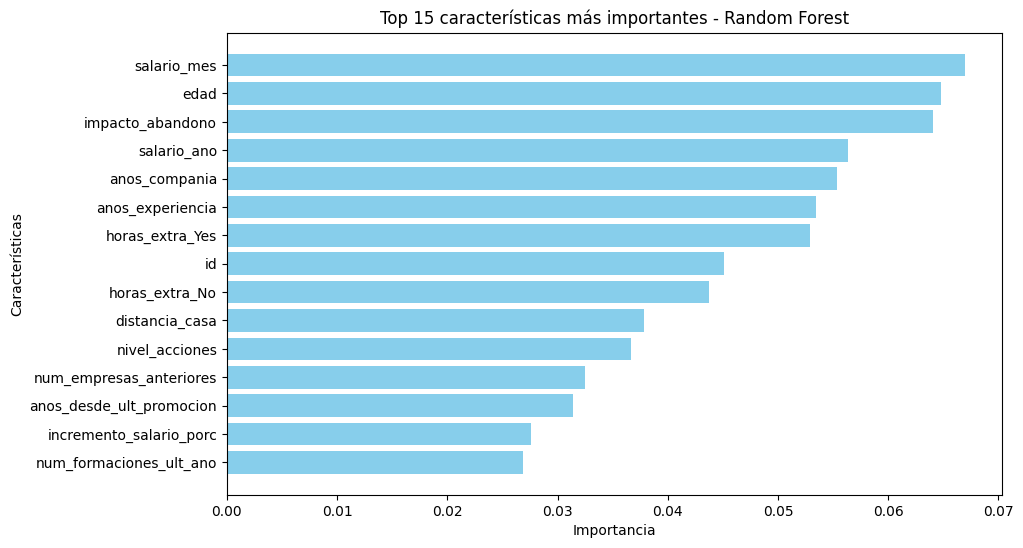

In [49]:
# Obtener importancias de características
importancias = RF.feature_importances_
caracteristicas = X_train.columns

# Crear DataFrame ordenado por importancia
df_importancias = pd.DataFrame({
    'Característica': caracteristicas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Característica'][:15], df_importancias['Importancia'][:15], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 15 características más importantes - Random Forest')
plt.gca().invert_yaxis()  # para que la más importante quede arriba
plt.show()

Las variables mas importantes son:
- salario_mes(salario_ano, son la misma)
- impacto_abandono 
- edad
- años_experiencia
- años_compañia
- distancia_casa
- horas_extra(si/no)

#### Explotación

Incoporación del scoring al dataframe principal. Explotación (huso directo de obtención de resultados) y descarga del resultados.

Vamos a exportar el vector de números de predicción que habíamos calculado.

Todos los algoritmos en sklearn funcionan igual: fit para entrenar y predict para predecir (en este caso con "_proba", porque queremos la probabilidad)

Partimos del dataset total, el inicial (df), y construir una nueva variable "scoring de abandono", que rellenaremos con la predicción una vez que hemos eliminado nuestra columna de abandono de nuestro dataframe de machine learning. Esta predicción nos va a devolver dos cosas, la prob de que no abandone y la de que si, y nos vamos a quedar con la de que si (que sean unos).

*un Bayesiano Ingenuo te da las probabilidades directamente, no?. O incluso un GMM si queremos usar tecnicas no supervisadas*

In [50]:
# Ese [:, 1] está diciendo:
# “Dame todas las filas (:), pero solo la columna 1” del resultado que devuelve predict_proba.

df['scoring_abandono']=RF.predict_proba(df_ml.drop(columns='abandono'))[:,1]

df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,id,satisfaccion_entorno,implicacion,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
0,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,Baja,0,8,0,6,0,5,71916,14670.864,0.570483
1,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,2,Alta,Media,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.080278
2,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,4,Muy_Alta,Media,...,Media,0,7,3,0,0,0,25080,4037.880,0.784237
3,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,5,Muy_Alta,Alta,...,Alta,0,8,3,8,3,0,34908,6876.876,0.234665
4,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,7,Baja,Alta,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.066250


Con esta nueva información, podemos empezar a buscar casos concretos sobre los que trabajar. Por ejemplo:

Los 10 empleados con mayor probabilidad de dejar la empresa.

Tomamos el dataframe original (df), mediante "sort_values" los ordenamos por el scoring_abandono en descendente, e imprimimos los 10 primeros.

In [51]:
df.sort_values(by='scoring_abandono',ascending=False)[:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,id,satisfaccion_entorno,implicacion,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
911,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,1273,Alta,Baja,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,0.904598
1332,29,1,Travel_Frequently,Research & Development,24,Secundaria,Life Sciences,1868,Muy_Alta,Media,...,Media,0,1,3,1,1,0,29268,4712.148,0.848357
688,19,1,Travel_Rarely,Sales,21,Secundaria,Other,959,Muy_Alta,Media,...,Media,0,1,3,1,0,0,25452,4097.772,0.845452
463,26,1,Travel_Rarely,Research & Development,24,Primaria,Technical Degree,622,Alta,Baja,...,Media,0,1,3,1,0,0,28080,4520.880,0.830845
1339,22,1,Travel_Rarely,Research & Development,7,Universitaria,Life Sciences,1878,Muy_Alta,Alta,...,Baja,0,1,2,1,0,0,29664,4775.904,0.827929
127,19,1,Travel_Rarely,Sales,22,Universitaria,Marketing,167,Muy_Alta,Alta,...,Muy_Alta,0,0,2,0,0,0,20100,3236.100,0.827060
457,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,614,Media,Alta,...,Muy_Alta,0,0,3,0,0,0,22536,3628.296,0.826478
1273,22,1,Travel_Rarely,Research & Development,8,Universitaria,Medical,1783,Alta,Alta,...,Alta,0,1,6,1,0,0,28776,4632.936,0.824371
1153,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,1624,Media,Alta,...,Alta,0,0,2,0,0,0,18828,3031.308,0.820246
892,19,1,Non-Travel,Research & Development,10,Secundaria,Medical,1248,Baja,Media,...,Media,0,1,2,1,0,0,22308,3591.588,0.818044


Otro ejemplo sería: riesgo de dejar la empresa en función del puesto de trabajo

<Axes: title={'center': 'scoring_abandono'}, xlabel='puesto'>

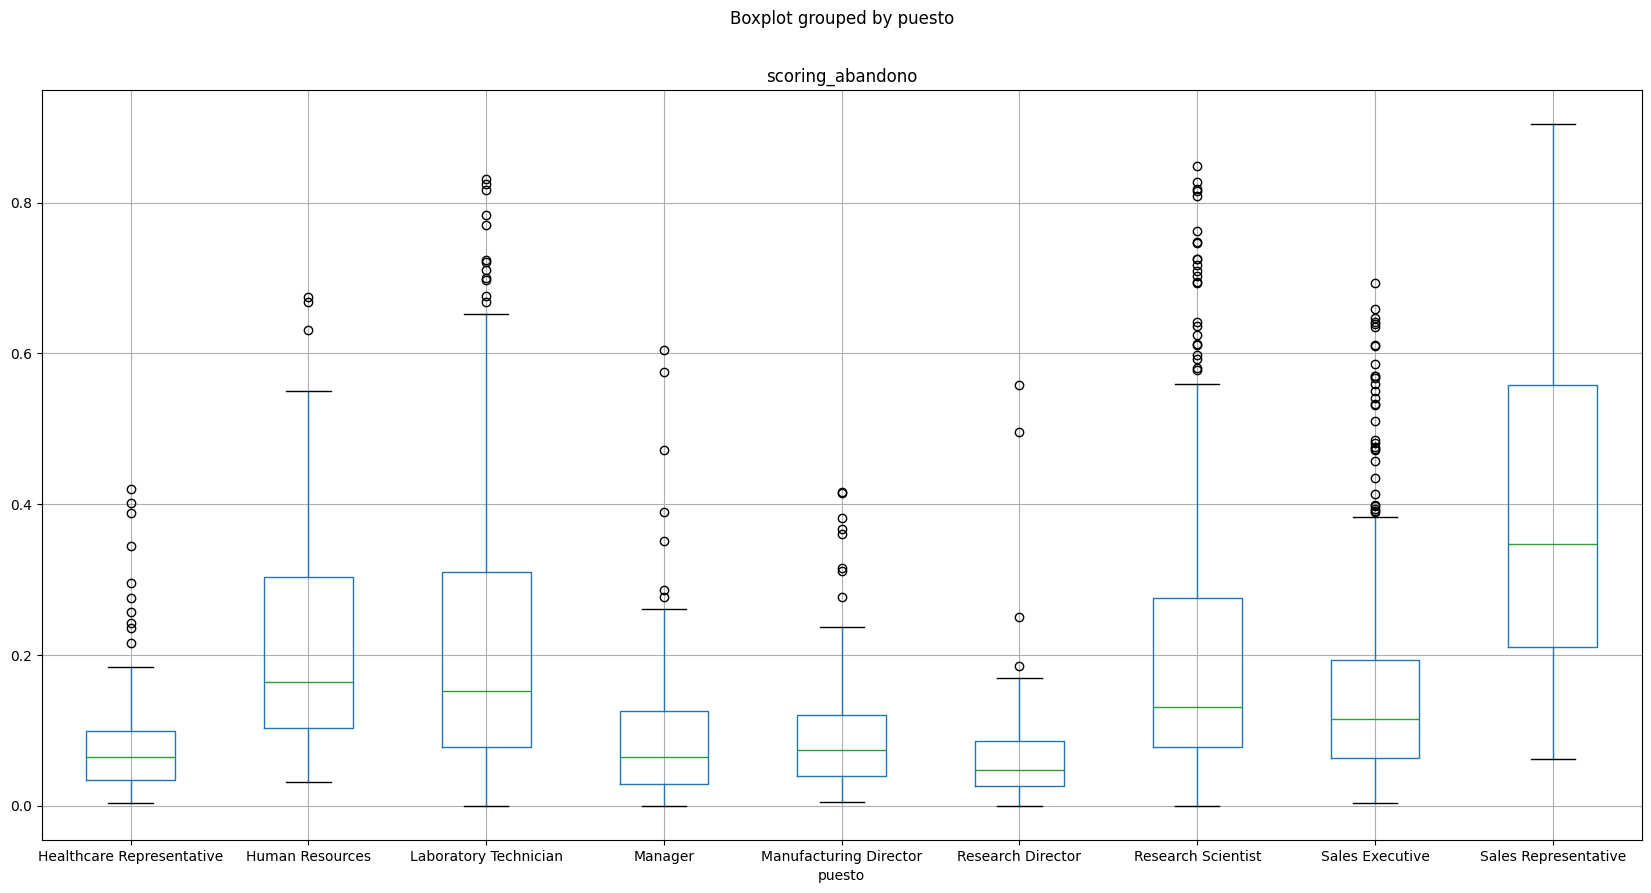

In [52]:
df.boxplot(column='scoring_abandono',by='puesto',figsize=(20,10))

El gráfico nos confirma que las áreas de ventas son las que tienen mayor probabilidad de abandono de la empresa.

#### Guardar el resultado


In [53]:
# df["id"] = df["id"].astype(str)
# df.to_csv(ruta+r'/data/abandono_con_scoring.csv', index=False)
# print("Archivo 'abandono_con_scoring.csv' guardado con éxito.")


## **VISUALIZACIÓN Y COMUNICACIÓN**

https://public.tableau.com/app/profile/alicia.gil.matute/viz/DashboardAbandonoEmpleados_17549150031180/Dashboard1